In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Part 1: EDA and Feature Engineering

## a) EDA

In [122]:
df = pd.read_csv('./Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [123]:
print(df.shape)

(14640, 15)


In [124]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [125]:
df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'user_timezone', 'name'], axis=1, inplace=True)
df.shape

(14640, 10)

In [126]:
df.isna().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
dtype: int64

In [127]:
df.fillna({'negativereason_confidence': 0, 'tweet_location': '', 'negativereason':''}, inplace=True)

In [128]:
df.isna().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
dtype: int64

In [129]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

Tweet length and label proportion

In [130]:
df['tweet_length'] = df['text'].apply(len)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,tweet_length
0,570306133677760513,neutral,1.0000,,0.0000,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,,35
1,570301130888122368,positive,0.3486,,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,,72
2,570301083672813571,neutral,0.6837,,0.0000,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,71
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,,126
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,,55


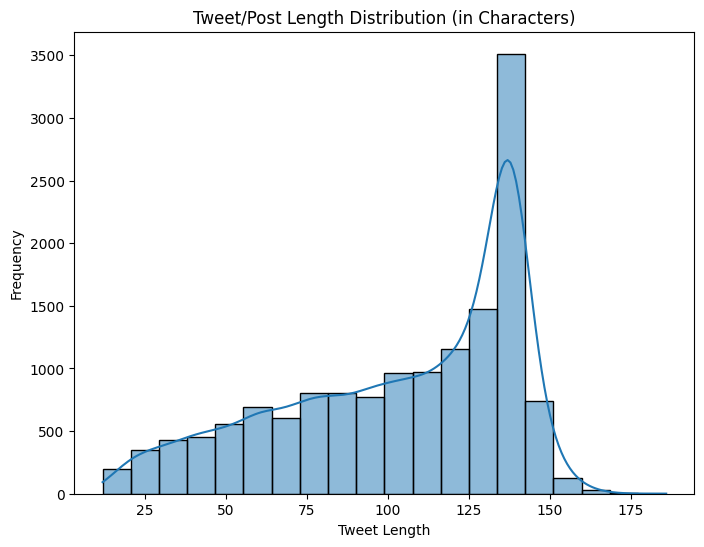

In [131]:
plt.figure(figsize=(8,6))
sns.histplot(df['tweet_length'], bins=20, kde=True)
plt.title('Tweet/Post Length Distribution (in Characters)')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

In [132]:
df['tweet_length'].describe()

count    14640.000000
mean       103.822063
std         36.277339
min         12.000000
25%         77.000000
50%        114.000000
75%        136.000000
max        186.000000
Name: tweet_length, dtype: float64

Label Proportions

In [133]:
counts = df['airline_sentiment'].value_counts()
print(counts)

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


## b) Text Visualization

In [134]:
!pip install wordcloud
from wordcloud import WordCloud

You should consider upgrading via the 'D:\MSCS\FundaOfDS\FinalProject\cleanenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [135]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [136]:
sentiments = {}
for _class in df['airline_sentiment'].unique():
    subset = df[df['airline_sentiment'] == _class]

    text = ' '.join(subset['text'].astype(str).tolist())

    sentiments[_class] = text

sentiments

{'neutral': '@VirginAmerica What @dhepburn said. @VirginAmerica I didn\'t today... Must mean I need to take another trip! @VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP @VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24 @VirginAmerica will you be making BOS&gt;LAS non stop permanently anytime soon? @VirginAmerica do you miss me? Don\'t worry we\'ll be together very soon. @VirginAmerica LAX to EWR - Middle seat on a red eye. Such a noob maneuver. #sendambien #andchexmix @VirginAmerica Are the hours of operation for the Club at SFO that are posted online current? Nice RT @VirginAmerica: Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP @VirginAmerica when can I book my flight to Hawaii?? @VirginAmerica plz help me win my bid upgrade for my flight 2/27 LAX---&gt;SEA!!!  🍷👍💺✈️ @VirginAmerica I have an unused ticket but

Word Cloud for neutral class:


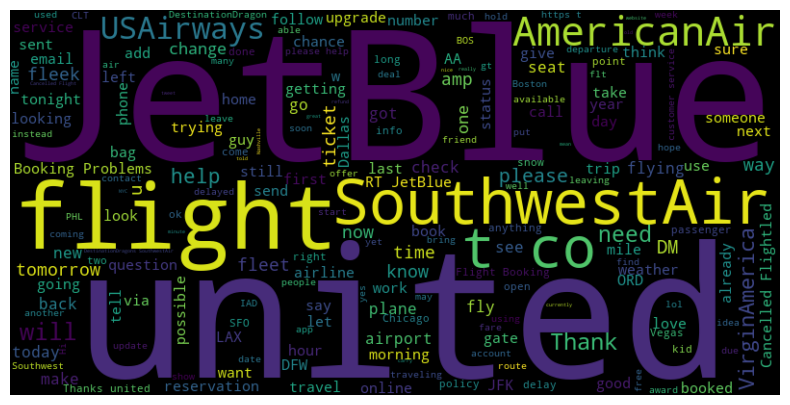

Word Cloud for positive class:


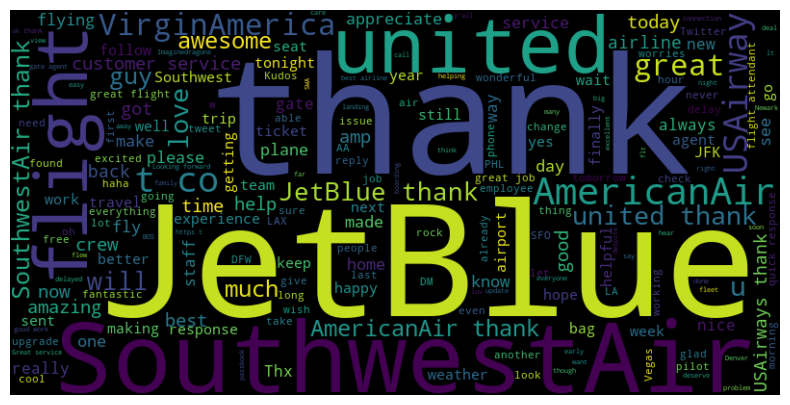

Word Cloud for negative class:


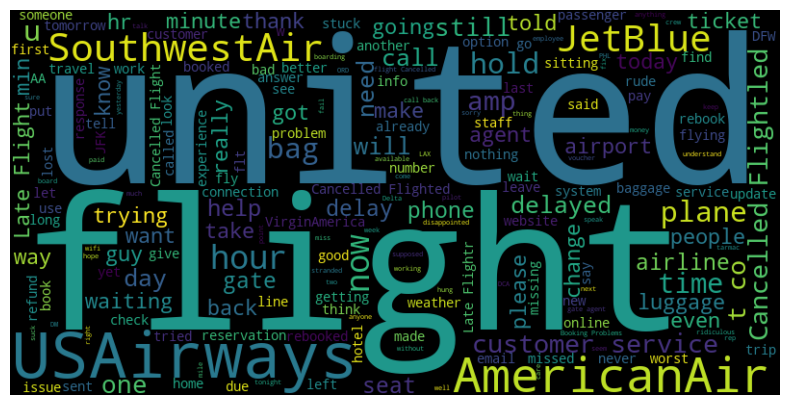

In [137]:
for sentiment in sentiments:

    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(sentiments[sentiment])
    print(f'Word Cloud for {sentiment} class:')
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [138]:
from collections import Counter
import re

In [139]:
def get_n_frequent_words(text, n=10):
    words = re.findall(r'\b\w+\b', text.lower())
    word_counts = Counter(words)
    return word_counts.most_common(n)

In [140]:
n = 10
for sentiment in sentiments:
    top_words = get_n_frequent_words(sentiments[sentiment], n)
    print(f'top {n} words for {sentiment} class:')
    print(top_words)

top 10 words for neutral class:
[('to', 1666), ('i', 1384), ('the', 975), ('a', 793), ('you', 766), ('jetblue', 748), ('united', 737), ('t', 732), ('on', 673), ('southwestair', 671)]
top 10 words for positive class:
[('the', 972), ('to', 938), ('you', 913), ('i', 754), ('for', 670), ('thanks', 611), ('jetblue', 595), ('southwestair', 576), ('a', 533), ('united', 528)]
top 10 words for negative class:
[('to', 6048), ('i', 4565), ('the', 4114), ('a', 3188), ('flight', 2943), ('united', 2899), ('and', 2825), ('on', 2792), ('you', 2722), ('for', 2714)]


Tweet post length histogram is printed above.

## c) Preprocessing and Feature Engineering

In [141]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

You should consider upgrading via the 'D:\MSCS\FundaOfDS\FinalProject\cleanenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [142]:
def safe_nltk_download(resource):
    try:
        nltk.data.find(resource)
        print(f"✅ {resource} already available.")
    except LookupError:
        print(f"⬇️  Downloading {resource}...")
        nltk.download(resource.split('/')[-1])

safe_nltk_download('corpora/stopwords')
safe_nltk_download('tokenizers/punkt')
safe_nltk_download('corpora/wordnet')
safe_nltk_download('punkt_tab')
safe_nltk_download('omw-1.4') 

✅ corpora/stopwords already available.
✅ tokenizers/punkt already available.
⬇️  Downloading corpora/wordnet...
⬇️  Downloading punkt_tab...
⬇️  Downloading omw-1.4...


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [143]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [144]:
def clean_text(text):
    text = text.lower()

    text = re.sub(r'[^a-z\s]', '', text)

    tokens = nltk.word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words] #remove stop words

    # tokens = [stemmer.stem(word) for word in tokens] #stemming

    tokens = [lemmatizer.lemmatize(word) for word in tokens] #lemmatization


    cleaned_text = ' '.join(tokens)

    return cleaned_text


In [145]:
df['cleaned_text'] = df['text'].apply(clean_text)
df['cleaned_text']

0                              virginamerica dhepburn said
1        virginamerica plus youve added commercial expe...
2        virginamerica didnt today must mean need take ...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving minute late flight warning...
14637    americanair please bring american airline blac...
14638    americanair money change flight dont answer ph...
14639    americanair ppl need know many seat next fligh...
Name: cleaned_text, Length: 14640, dtype: object

Now again looking at word count after cleaning text

In [146]:
sentiments = {}
for _class in df['airline_sentiment'].unique():
    subset = df[df['airline_sentiment'] == _class]

    text = ' '.join(subset['cleaned_text'].astype(str).tolist())

    sentiments[_class] = text

def get_n_frequent_words(text, n=10):
    words = re.findall(r'\b\w+\b', text.lower())
    word_counts = Counter(words)
    return word_counts.most_common(n)

n = 10
for sentiment in sentiments:
    top_words = get_n_frequent_words(sentiments[sentiment], n)
    print(f'top {n} words for {sentiment} class:')
    print(top_words)

top 10 words for neutral class:
[('flight', 769), ('united', 734), ('jetblue', 722), ('southwestair', 668), ('americanair', 499), ('usairways', 401), ('get', 241), ('need', 179), ('please', 179), ('virginamerica', 176)]
top 10 words for positive class:
[('thanks', 609), ('jetblue', 589), ('southwestair', 573), ('united', 527), ('thank', 453), ('flight', 435), ('americanair', 354), ('usairways', 276), ('great', 233), ('service', 162)]
top 10 words for negative class:
[('flight', 3337), ('united', 2883), ('usairways', 2374), ('americanair', 2104), ('southwestair', 1212), ('hour', 1097), ('jetblue', 1050), ('get', 1011), ('cancelled', 920), ('customer', 773)]


**Representations**

Bag of words

In [147]:
from sklearn.feature_extraction.text import CountVectorizer

In [148]:
vectorizer = CountVectorizer()

X_bow = vectorizer.fit_transform(df['cleaned_text'])
X_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 141866 stored elements and shape (14640, 13486)>

In [149]:
bow_cols = vectorizer.get_feature_names_out()
bow_cols

array(['aa', 'aaaand', 'aaadvantage', ..., 'zukes', 'zurich', 'zurichnew'],
      dtype=object)

In [150]:
vectorizer.vocabulary_.get('zurich')

13484

In [151]:
#convert to dataframe
bow_df = pd.DataFrame(X_bow.toarray(), columns=bow_cols)
bow_df.head()

,aa,aaaand,aaadvantage,aaalwayslate,aaba,aacom,aacustomerservice,aadavantage,aadelay,aadfw,...,zj,zkatcher,zombie,zone,zoom,zrh,zrhairport,zukes,zurich,zurichnew
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF-IDF

In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [153]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

In [154]:
tfidf_cols = tfidf.get_feature_names_out()
tfidf_cols

array(['aa', 'aaaand', 'aaadvantage', ..., 'zukes', 'zurich', 'zurichnew'],
      dtype=object)

In [155]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_cols)
tfidf_df.head()

,aa,aaaand,aaadvantage,aaalwayslate,aaba,aacom,aacustomerservice,aadavantage,aadelay,aadfw,...,zj,zkatcher,zombie,zone,zoom,zrh,zrhairport,zukes,zurich,zurichnew
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Part 2: Model Building

## a. Model Training

**Naive Bayes**

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Split using Bag of Words

In [157]:
y = df['airline_sentiment']


In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    bow_df, 
    y,
    test_size=0.2, 
    random_state=20, 
    stratify=y
)

In [159]:
print("#############################################################")
print("####### Classification using Bag of Words Representation ####")
print("#############################################################\n")
model = MultinomialNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Classification report for Naive Bayes:\n")
print(classification_report(y_test, prediction))

cm = confusion_matrix(y_test, prediction)
print(cm)
print("#############################################################\n")

model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Classification report for Logistic Regression:\n")
print(classification_report(y_test, prediction))

cm = confusion_matrix(y_test, prediction)
print(cm)
print("#############################################################\n")

model = DecisionTreeClassifier(max_depth=20, random_state=20)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Classification report for Decision Tree:\n")
print(classification_report(y_test, prediction))

cm = confusion_matrix(y_test, prediction)
print(cm)
print("#############################################################\n")

#############################################################
####### Classification using Bag of Words Representation ####
#############################################################

Classification report for Naive Bayes:

              precision    recall  f1-score   support

    negative       0.79      0.94      0.86      1835
     neutral       0.66      0.41      0.51       620
    positive       0.74      0.55      0.63       473

    accuracy                           0.77      2928
   macro avg       0.73      0.63      0.67      2928
weighted avg       0.75      0.77      0.75      2928

[[1727   76   32]
 [ 308  253   59]
 [ 160   52  261]]
#############################################################

Classification report for Logistic Regression:

              precision    recall  f1-score   support

    negative       0.84      0.89      0.87      1835
     neutral       0.62      0.57      0.59       620
    positive       0.71      0.62      0.66       473

    accu

Split using TF-IDF

In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_df, 
    y,
    test_size=0.2, 
    random_state=20, 
    stratify=y
)

In [161]:
print("#############################################################")
print("####### Classification using TF-IDF Representation ##########")
print("#############################################################\n")
model = MultinomialNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Classification report for Naive Bayes:\n")
print(classification_report(y_test, prediction))
cm = confusion_matrix(y_test, prediction)
print(cm)
print("#############################################################\n")

model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Classification report for Logistic Regression:\n")
print(classification_report(y_test, prediction))
cm = confusion_matrix(y_test, prediction)
print(cm)
print("#############################################################\n")

model = DecisionTreeClassifier(max_depth=20, random_state=20)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Classification report for Decision Tree:\n")
print(classification_report(y_test, prediction))
cm = confusion_matrix(y_test, prediction)
print(cm)
print("#############################################################\n")

#############################################################
####### Classification using TF-IDF Representation ##########
#############################################################

Classification report for Naive Bayes:

              precision    recall  f1-score   support

    negative       0.67      1.00      0.80      1835
     neutral       0.84      0.15      0.25       620
    positive       0.79      0.16      0.27       473

    accuracy                           0.68      2928
   macro avg       0.77      0.44      0.44      2928
weighted avg       0.73      0.68      0.60      2928

[[1831    4    0]
 [ 509   91   20]
 [ 384   13   76]]
#############################################################

Classification report for Logistic Regression:

              precision    recall  f1-score   support

    negative       0.80      0.95      0.87      1835
     neutral       0.69      0.47      0.56       620
    positive       0.77      0.55      0.64       473

    accu

**Black-Box Models**

Deep Neural Network

In [162]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [163]:
#to use TF-IDF for DNN 
X = tfidf_df.to_numpy().astype('float32') #pd df to numpy
encoder = LabelEncoder()
y = encoder.fit_transform(y) #encode target to numerical values
y = to_categorical(y) #one hot encoding 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2, 
    random_state=20, 
    stratify=y
)

In [164]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=12, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/12
12/12 [==============================] - 2s 78ms/step - loss: 1.0571 - accuracy: 0.5924 - val_loss: 0.9906 - val_accuracy: 0.6267
Epoch 2/12
12/12 [==============================] - 0s 30ms/step - loss: 0.9193 - accuracy: 0.6270 - val_loss: 0.8456 - val_accuracy: 0.6267
Epoch 3/12
12/12 [==============================] - 0s 28ms/step - loss: 0.8036 - accuracy: 0.6270 - val_loss: 0.7851 - val_accuracy: 0.6267
Epoch 4/12
12/12 [==============================] - 0s 27ms/step - loss: 0.7228 - accuracy: 0.6305 - val_loss: 0.7123 - val_accuracy: 0.6465
Epoch 5/12
12/12 [==============================] - 0s 26ms/step - loss: 0.6275 - accuracy: 0.7036 - val_loss: 0.6484 - val_accuracy: 0.7370
Epoch 6/12
12/12 [==============================] - 0s 26ms/step - loss: 0.5318 - accuracy: 0.8101 - val_loss: 0.5886 - val_accuracy: 0.7746
Epoch 7/12
12/12 [==============================] - 0s 26ms/step - loss: 0.4349 - accuracy: 0.8735 - val_loss: 0.5451 - val_accuracy: 0.7872
Epoch 8/12
12

In [165]:
predictions_probability = model.predict(X_test)
predictions = (predictions_probability >= 0.5).astype(int)
accuracy_score(y_test, predictions)

92/92 [==============================] - 0s 4ms/step


0.7715163934426229

In [168]:
print(f"{classification_report(y_test, predictions, zero_division=0)}")

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1835
           1       0.67      0.52      0.58       620
           2       0.77      0.62      0.69       473

   micro avg       0.80      0.77      0.79      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.79      0.77      0.78      2928
 samples avg       0.77      0.77      0.77      2928



In [50]:
#to use Bag of Words for DNN 
X = bow_df.to_numpy().astype('float32') #pd df to numpy

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2, 
    random_state=20, 
    stratify=y
)

In [51]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=12, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/12
12/12 [==============================] - 1s 33ms/step - loss: 1.0081 - accuracy: 0.5651 - val_loss: 0.8769 - val_accuracy: 0.6267
Epoch 2/12
12/12 [==============================] - 0s 23ms/step - loss: 0.8100 - accuracy: 0.6270 - val_loss: 0.7720 - val_accuracy: 0.6267
Epoch 3/12
12/12 [==============================] - 0s 23ms/step - loss: 0.7195 - accuracy: 0.6327 - val_loss: 0.6985 - val_accuracy: 0.6523
Epoch 4/12
12/12 [==============================] - 0s 22ms/step - loss: 0.6279 - accuracy: 0.7134 - val_loss: 0.6369 - val_accuracy: 0.7456
Epoch 5/12
12/12 [==============================] - 0s 22ms/step - loss: 0.5316 - accuracy: 0.8095 - val_loss: 0.5686 - val_accuracy: 0.7821
Epoch 6/12
12/12 [==============================] - 0s 23ms/step - loss: 0.4261 - accuracy: 0.8614 - val_loss: 0.5276 - val_accuracy: 0.7930
Epoch 7/12
12/12 [==============================] - 0s 22ms/step - loss: 0.3394 - accuracy: 0.8853 - val_loss: 0.5291 - val_accuracy: 0.7947
Epoch 8/12
12

In [52]:
predictions_probability = model.predict(X_test)
predictions = (predictions_probability >= 0.5).astype(int)
accuracy_score(y_test, predictions)

92/92 [==============================] - 0s 1ms/step


0.7780054644808743

In [53]:
print(f"{classification_report(y_test, predictions, zero_division=0)}")

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1835
           1       0.64      0.54      0.58       620
           2       0.74      0.67      0.70       473

   micro avg       0.79      0.78      0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.78      0.78      2928
 samples avg       0.78      0.78      0.78      2928



LSTM

In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM

In [55]:
texts = df['cleaned_text'].astype(str).tolist()
texts

['virginamerica dhepburn said',
 'virginamerica plus youve added commercial experience tacky',
 'virginamerica didnt today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse',
 'virginamerica really big bad thing',
 'virginamerica seriously would pay flight seat didnt playing really bad thing flying va',
 'virginamerica yes nearly every time fly vx ear worm wont go away',
 'virginamerica really missed prime opportunity men without hat parody httpstcomwpggrezp',
 'virginamerica well didntbut',
 'virginamerica amazing arrived hour early youre good',
 'virginamerica know suicide second leading cause death among teen',
 'virginamerica lt pretty graphic much better minimal iconography',
 'virginamerica great deal already thinking nd trip australia amp havent even gone st trip yet p',
 'virginamerica virginmedia im flying fabulous seductive sky u take stress away travel httptcoahlxhhkiyn',
 'virginamerica thanks',

In [56]:
tokenizer = Tokenizer(num_words=13000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

vocab_size = len(tokenizer.word_index) + 1
print(f"Vocab size: {vocab_size}")
# sequences

Vocab size: 13508


In [57]:
len_max = max([len(sequence) for sequence in sequences])
padded_sequences = pad_sequences(sequences, maxlen=len_max, padding='pre')

print(f"Padded data shape: {padded_sequences.shape}")

Padded data shape: (14640, 22)


In [58]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['airline_sentiment'])
y = to_categorical(y, num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,  
    y,         
    test_size=0.2,
    random_state=20,
    stratify=y 
)

In [59]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=22),
    LSTM(units=128, return_sequences=False),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 22, 100)           1350800   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1476499 (5.63 MB)
Trainable params: 1476

In [60]:
model.fit(X_train, y_train, epochs=12, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/12
12/12 [==============================] - 2s 77ms/step - loss: 1.0167 - accuracy: 0.6029 - val_loss: 0.9206 - val_accuracy: 0.6267
Epoch 2/12
12/12 [==============================] - 1s 55ms/step - loss: 0.8785 - accuracy: 0.6270 - val_loss: 0.8142 - val_accuracy: 0.6537
Epoch 3/12
12/12 [==============================] - 1s 55ms/step - loss: 0.7467 - accuracy: 0.6796 - val_loss: 0.7274 - val_accuracy: 0.6895
Epoch 4/12
12/12 [==============================] - 1s 56ms/step - loss: 0.6299 - accuracy: 0.7426 - val_loss: 0.6508 - val_accuracy: 0.7497
Epoch 5/12
12/12 [==============================] - 1s 55ms/step - loss: 0.5126 - accuracy: 0.8011 - val_loss: 0.5940 - val_accuracy: 0.7579
Epoch 6/12
12/12 [==============================] - 1s 55ms/step - loss: 0.4021 - accuracy: 0.8454 - val_loss: 0.5747 - val_accuracy: 0.7818
Epoch 7/12
12/12 [==============================] - 1s 56ms/step - loss: 0.3076 - accuracy: 0.8902 - val_loss: 0.5902 - val_accuracy: 0.7876
Epoch 8/12
12

In [61]:
predictions_probability = model.predict(X_test)
predictions = (predictions_probability >= 0.5).astype(int)
accuracy_score(y_test, predictions)

92/92 [==============================] - 0s 3ms/step


0.7622950819672131

In [62]:
print(f"{classification_report(y_test, predictions, zero_division=0)}")

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1835
           1       0.58      0.58      0.58       620
           2       0.73      0.62      0.67       473

   micro avg       0.77      0.76      0.77      2928
   macro avg       0.72      0.69      0.70      2928
weighted avg       0.77      0.76      0.76      2928
 samples avg       0.76      0.76      0.76      2928



BERT

In [171]:
import torch
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers.legacy import Adam

In [172]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


In [173]:
texts = df['text'].tolist()
y = df['airline_sentiment']

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['airline_sentiment'])
labels = df['label'].values

encodings = tokenizer(
    texts,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='tf' 
)

input_ids = encodings['input_ids'].numpy()
attention_mask = encodings['attention_mask'].numpy()

X_train_ids, X_test_ids, y_train, y_test, train_mask, test_mask = train_test_split(
    input_ids,
    labels,
    attention_mask,
    test_size=0.2,
    random_state=20,
    stratify=labels
)

d:\MSCS\FundaOfDS\FinalProject\cleanenv\lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [174]:
model_BERT = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

model_BERT.compile(
    optimizer=Adam(learning_rate=2e-5),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model_BERT.fit(
    [X_train_ids, train_mask],
    y_train,
    validation_data=([X_test_ids, test_mask], y_test),
    epochs=3,
    batch_size=100
)

d:\MSCS\FundaOfDS\FinalProject\cleanenv\lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
118/118 [==============================] - 999s 8s/step - loss: 0.7263 - accuracy: 0.7017 - val_loss: 0.4432 - val_accuracy: 0.8371
Epoch 2/3
118/118 [==============================] - 936s 8s/step - loss: 0.3985 - accuracy: 0.8489 - val_loss: 0.4029 - val_accuracy: 0.8497
Epoch 3/3
118/118 [==============================] - 989s 8s/step - loss: 0.3123 - accuracy: 0.8861 - val_loss: 0.4215 - val_accuracy: 0.8415


In [179]:
prediction_BERT = model_BERT.predict([X_test_ids, test_mask])
logits = prediction_BERT.logits

prediction_labels_BERT = np.argmax(logits, axis=1)

print(classification_report(y_test, prediction_labels_BERT, target_names=label_encoder.classes_))


92/92 [==============================] - 60s 648ms/step
              precision    recall  f1-score   support

    negative       0.90      0.91      0.91      1835
     neutral       0.74      0.64      0.69       620
    positive       0.73      0.84      0.78       473

    accuracy                           0.84      2928
   macro avg       0.79      0.80      0.79      2928
weighted avg       0.84      0.84      0.84      2928



In [182]:
cm = confusion_matrix(y_test, prediction_labels_BERT)
cm

array([[1671,   98,   66],
       [ 146,  395,   79],
       [  35,   40,  398]], dtype=int64)

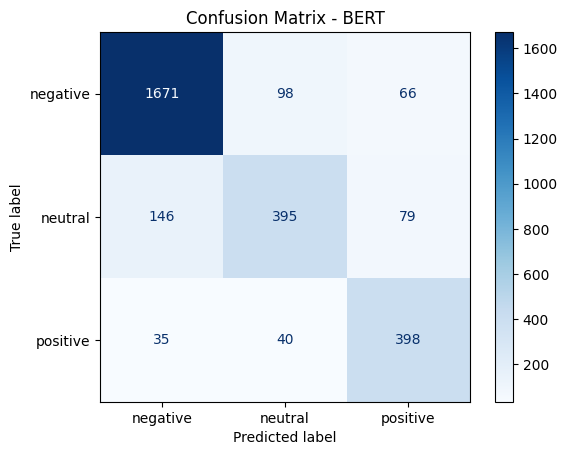

In [185]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction_labels_BERT)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - BERT")
plt.show()

# Part 3

## a) Error Analysis

In [199]:
X_train_texts, X_test_texts = train_test_split(
    texts, 
    test_size=0.2,
    random_state=20,
    stratify=labels
)

max_tweets = 15
count = 0
for i in range(len(y_test)):
    if y_test[i] != prediction_labels_BERT[i] and count<max_tweets:
        print(count+1)
        print(f"Text: {X_test_texts[i]}")
        print(f"True Label: {label_encoder.inverse_transform([y_test[i]])[0]}")
        print(f"Predicted Label: {label_encoder.inverse_transform([prediction_labels_BERT[i]])[0]}")
        print('-' * 100)
        count += 1


1
Text: @AmericanAir We've sent you more info via DM.  I truly hope you resolve this very quickly. #media #filmcrew #cnn #nbc
True Label: neutral
Predicted Label: negative
----------------------------------------------------------------------------------------------------
2
Text: @AmericanAir yes it is in Dulles and I need it delivered to the Embassy Suites in Herndon, VA. I'm still in Chicago from the fiasco in LAX
True Label: negative
Predicted Label: neutral
----------------------------------------------------------------------------------------------------
3
Text: @united please be good to me this weekend!
True Label: neutral
Predicted Label: positive
----------------------------------------------------------------------------------------------------
4
Text: @united You delayed a connection for customer service today now I'll be able to pay my final respects to a dear family member. Thank you :)
True Label: positive
Predicted Label: negative
----------------------------------------